<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Cp1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cp1. Introduction

In [1]:
import numpy as np
a = np.array([[1, 2, 3], [1, 2, 3]])
print("array\n", a)

array
 [[1 2 3]
 [1 2 3]]


In [2]:
from scipy import sparse

x = np.eye(4)
print("단위 행렬 만들기 : \n", x)

# sparse matrix로 변경해보기
m = sparse.csr_matrix(x)
print("\nsparse matrix로 나타내기 :\n",m)

단위 행렬 만들기 : 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

sparse matrix로 나타내기 :
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


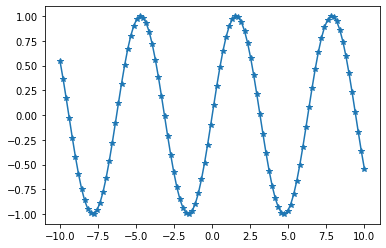

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='*')

In [4]:
import pandas as pd

data = {
    'Name' : [ "wonbin", "boseung", "seobin"],
    'Location' : ["Seoul", "Daejeon", "Incheon"],
    'Age' : [22, 22, 21]
}

pd_data = pd.DataFrame(data)
print("raw data :\n", data)
print("\npandas data :\n", pd_data)
pd_data

raw data :
 {'Name': ['wonbin', 'boseung', 'seobin'], 'Location': ['Seoul', 'Daejeon', 'Incheon'], 'Age': [22, 22, 21]}

pandas data :
       Name Location  Age
0   wonbin    Seoul   22
1  boseung  Daejeon   22
2   seobin  Incheon   21


,Name,Location,Age
0,wonbin,Seoul,22
1,boseung,Daejeon,22
2,seobin,Incheon,21


In [5]:
# pandas data에 쿼리 날리기

pd_data[pd_data.Age>21]

,Name,Location,Age
0,wonbin,Seoul,22
1,boseung,Daejeon,22


## 붓꽃의 품종 분류하기

In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("iris dataset의 키값 :\n ", iris_dataset.keys())
print("\niris dataset 설명 :\n", iris_dataset['DESCR'][:193])
print("\n타깃의 이름 :\n", iris_dataset['target_names'])
print("\n특성의 이름 :\n", iris_dataset['feature_names'])
print("\ndata의 크기 확인해보기\n", iris_dataset['data'].shape)
print("\n처음 다섯 개의 샘플 데이터 확인해보기\n", iris_dataset['data'][:5])
print("\ntarget의 크기 확인해보기\n", iris_dataset['target'].shape)

iris dataset의 키값 :
  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

iris dataset 설명 :
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre

타깃의 이름 :
 ['setosa' 'versicolor' 'virginica']

특성의 이름 :
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

data의 크기 확인해보기
 (150, 4)

처음 다섯 개의 샘플 데이터 확인해보기
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

target의 크기 확인해보기
 (150,)


In [7]:
# training set과 test set으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

print("X_train의 크기 : ", X_train.shape)
print("X_tset의 크기 : ", X_test.shape)

X_train의 크기 :  (112, 4)
X_tset의 크기 :  (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a2cd1b8d0>,
      dtype=object)

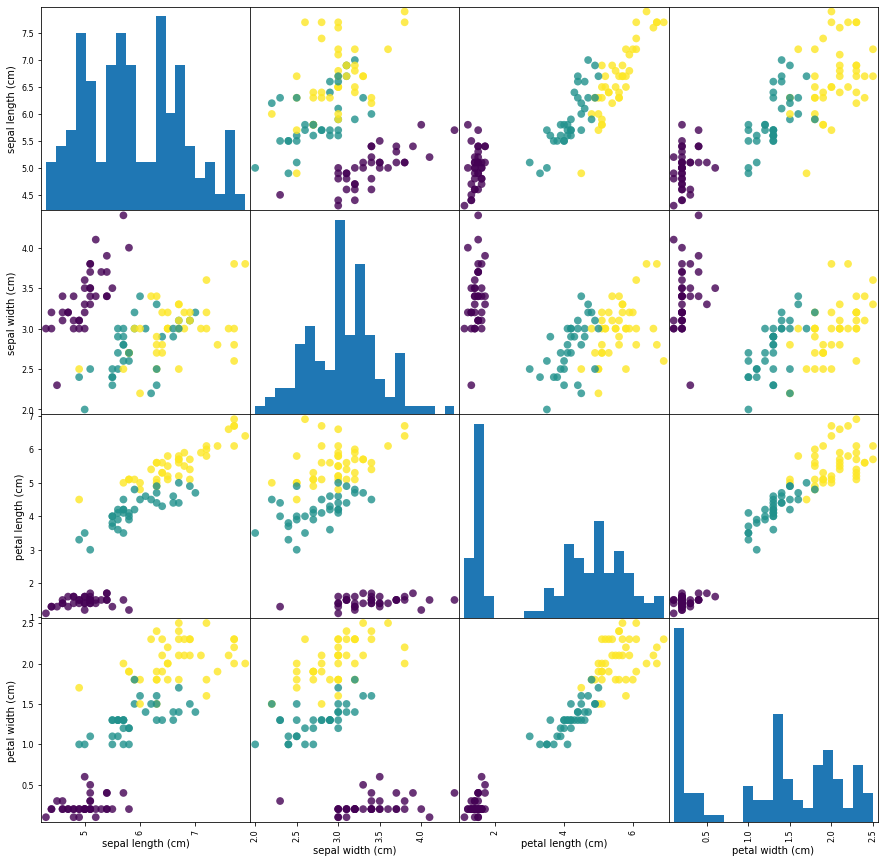

In [8]:
# 데이터 살펴보기 (pandas의 scatter matrix 이용)
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset['feature_names'])
pd.plotting.scatter_matrix(iris_dataframe,c = y_train, figsize = (15, 15), marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8)

In [13]:
# k-최근접 이웃 알고리즘

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

# 새로 데이터를 만들어 확인해보기
X_new = np.array([[5, 2.9,1, 0.2]])
prediction = knn.predict(X_new)
print("예측값 : ", prediction, iris_dataset['target_names'][prediction])

# test set으로 정확도 계산하기
y_prediction = knn.predict(X_test)
print("\n테스트의 예측값:\n", y_prediction)
print("정확도 : {:.2f}" .format(knn.score(X_test, y_test)))

예측값 :  [0] ['setosa']

테스트의 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
정확도 : 0.97
